In [2]:
%matplotlib inline
from sensible_raw.loaders import loader
import pandas
import subprocess
from collections import Counter
import matplotlib.pylab as plt
import numpy as np
import json

In [8]:
np.floor((10+7.5)/15)-1

0.0

### Inspecting data formating
#### Datasets: 
    stop_locations, sms, screen, facebook_friends, bluetooth, calllog, location.

In [2]:
columns_stop_locations, data_stop_locations = loader.load_data("stop_locations", "january_2014")

dict_tmp = {}
for column, array in zip(columns_stop_locations, data_stop_locations):
    dict_tmp[column] = array
dataframe_stop_locations = pandas.DataFrame(dict_tmp)

In [3]:
columns_sms, data_sms = loader.load_data("sms", "january_2014")

dict = {}
for column, array in zip(columns_sms, data_sms):
    dict[column] = array
dataframe_sms = pandas.DataFrame(dict)

In [2]:
columns_screen, data_screen = loader.load_data("screen", "january_2014")

dict = {}
for column, array in zip(columns_screen, data_screen):
    dict[column] = array
dataframe_screen = pandas.DataFrame(dict)

In [5]:
columns_facebook_friends, data_facebook_friends = loader.load_data("facebook_friends", "january_2014")

dict = {}
for column, array in zip(columns_facebook_friends, data_facebook_friends):
    dict[column] = array
dataframe_facebook_friends = pandas.DataFrame(dict)

In [4]:
columns_bluetooth, data_bluetooth = loader.load_data("bluetooth", "january_2014")

dict = {}
for column, array in zip(columns_bluetooth, data_bluetooth):
    dict[column] = array
    dataframe_bluetooth = pandas.DataFrame(dict)

In [7]:
columns_calllog, data_calllog = loader.load_data("calllog", "january_2014")

dict = {}
for column, array in zip(columns_calllog, data_calllog):
    dict[column] = array
dataframe_calllog = pandas.DataFrame(dict)

In [9]:
columns_location, data_location = loader.load_data("location", "january_2014")

dict = {}
for column, array in zip(columns_location, data_location):
    dict[column] = array
dataframe_location = pandas.DataFrame(dict)

In [9]:
columns_grades, data_grades = loader.load_data("grades", "january_2014")

dict = {}
for column, array in zip(columns_grades, data_grades):
    dict[column] = array
dataframe_grades = pandas.DataFrame(dict)

In [10]:
columns_vectors, data_vectors = loader.load_data("vectors", "vectors")

dict = {}
for column, array in zip(columns_vectors, data_vectors):
    dict[column] = array
dataframe_vectors = pandas.DataFrame(dict)

In [26]:
ds = []
for i in range(166):
    try:
        df = dataframe_vectors[dataframe_vectors['vector'] == i]
        if len(df) >= 3: ds.append(df)
    except KeyError:
        continue

(array([ 30.,  25.,  22.,   9.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.  ,   3.94,   4.88,   5.82,   6.76,   7.7 ,   8.64,   9.58,
         10.52,  11.46,  12.4 ,  13.34,  14.28,  15.22,  16.16,  17.1 ,
         18.04,  18.98,  19.92,  20.86,  21.8 ,  22.74,  23.68,  24.62,
         25.56,  26.5 ,  27.44,  28.38,  29.32,  30.26,  31.2 ,  32.14,
         33.08,  34.02,  34.96,  35.9 ,  36.84,  37.78,  38.72,  39.66,
         40.6 ,  41.54,  42.48,  43.42,  44.36,  45.3 ,  46.24,  47.18,
         48.12,  49.06,  50.  ]),
 <a list of 50 Patch objects>)

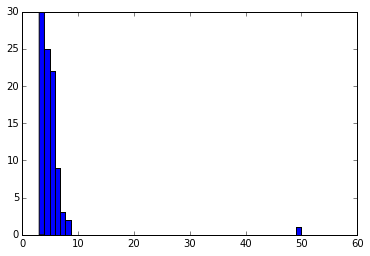

In [27]:
x = [len(v) for v in ds]
plt.hist(x,bins=50)

In [24]:
def func(longitude):
    return np.floor((longitude+7.5)/15)-1

from datetime import datetime as dt
from collections import defaultdict

ds = defaultdict(lambda: defaultdict(int))
for row in dataframe_location.iterrows():
    offset = func(row[1]['lon'])
    if offset != 0:
        ds[row[1]['user']].update({dt.fromtimestamp(row[1]['timestamp']/1000): offset})
    

KeyboardInterrupt: 

In [28]:
ds[512]

defaultdict(int,
            {datetime.datetime(2014, 1, 2, 1, 15): -7.0,
             datetime.datetime(2014, 1, 2, 1, 30): -7.0,
             datetime.datetime(2014, 1, 2, 1, 45): -7.0,
             datetime.datetime(2014, 1, 2, 2, 0): -7.0,
             datetime.datetime(2014, 1, 2, 2, 15): -7.0,
             datetime.datetime(2014, 1, 2, 2, 30): -7.0,
             datetime.datetime(2014, 1, 2, 2, 45): -7.0,
             datetime.datetime(2014, 1, 2, 3, 0): -7.0,
             datetime.datetime(2014, 1, 2, 3, 15): -7.0,
             datetime.datetime(2014, 1, 2, 3, 30): -7.0,
             datetime.datetime(2014, 1, 2, 3, 45): -7.0,
             datetime.datetime(2014, 1, 2, 4, 0): -7.0,
             datetime.datetime(2014, 1, 2, 4, 15): -7.0,
             datetime.datetime(2014, 1, 2, 4, 30): -7.0,
             datetime.datetime(2014, 1, 2, 4, 45): -7.0,
             datetime.datetime(2014, 1, 2, 5, 0): -7.0,
             datetime.datetime(2014, 1, 2, 5, 15): -7.0,
             datet

In [14]:
df_u = dataframe_bluetooth[(dataframe_bluetooth['bt_mac'] == 0) | (dataframe_bluetooth['user'] == 0)]

In [11]:
a = dataframe_bluetooth[dataframe_bluetooth['bt_mac'] == -1]
b = dataframe_bluetooth

In [13]:
a.shape[0]/float(b.shape[0])

0.3561799716648643

In [58]:
for i in range(166):
    try:
        sl = list(ds[i]['user'])
        if len(set(sl)) > 1:
            print i, sl
    except IndexError:
        continue

0 [710, 714, 72776, 808, 554, 638, 765, 72797, 362, 72816, 264, 72833, 72852, 716, 72941, 380, 511, 231, 16, 630, 72857, 767, 72874, 516, 45, 70, 675, 841, 30, 715, 67, 696, 72818, 225, 297, 739, 72940, 10, 127, 72842, 159, 72866, 72871, 72880, 326, 447, 629, 72901, 488, 334]
1 [178, 196, 271, 383, 682, 330]
2 [770, 709, 33]
3 [644, 415, 158, 94]
4 [823, 41, 72838, 213, 438]
5 [72839, 615, 405]
6 [72841, 490, 612]
7 [60, 779, 497]
8 [360, 220, 72930]
9 [72834, 534, 89]
10 [236, 515, 168]
11 [134, 836, 226]
12 [426, 283, 441, 307, 580]
13 [669, 9, 72840]
14 [455, 282, 439]
15 [522, 830, 816, 72847]
16 [72781, 346, 174, 72845, 621, 227, 251]
17 [72844, 72846, 197, 10482]
18 [72843, 331, 118, 545, 707, 72942]
19 [574, 436, 553]
20 [742, 702, 692, 59, 584, 582, 313, 85]
21 [295, 44, 379, 757]
22 [149, 72, 359, 339, 78]
23 [351, 367, 519, 541, 72868, 336]
24 [667, 654, 136, 72865, 72869, 650, 73, 72870]
25 [72853, 259, 24, 429, 418]
26 [72867, 663, 653, 513]
27 [72714, 15, 139, 672, 100, 56

In [17]:
#dataframe_facebook_friends
dt.fromtimestamp(1391050806)

datetime.datetime(2014, 1, 30, 3, 0, 6)

In [82]:
x = []

for user in set(list(dataframe_bluetooth['user'])):
    u_df = dataframe_bluetooth[dataframe_bluetooth['user'] == user]
    non_study = len(u_df[u_df['bt_mac'] < -1])
    x.append(non_study * 1.0/len(u_df))

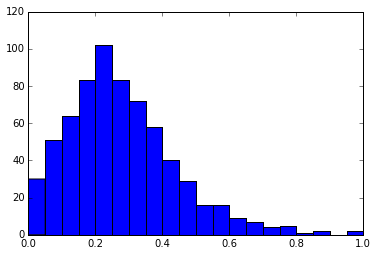

In [88]:
plt.hist(x,bins=20)
plt.show()

In [8]:
dataframe_sms.sort(['user','timestamp', 'address'],ascending=[1,1,1])

,address,status,timestamp,type,user
40768,991,-1,1388536198000,1,0
38988,15185,-1,1388561346000,1,0
39816,15185,-1,1388612611000,2,0
39564,991,-1,1388674061000,1,0
39565,15185,-1,1388675741000,1,0
39566,991,-1,1388678626000,1,0
39567,3519,-1,1388693399000,1,0
39568,991,-1,1388698081000,1,0
37139,1794,-1,1388758491000,1,0
37140,1794,-1,1388758507000,2,0


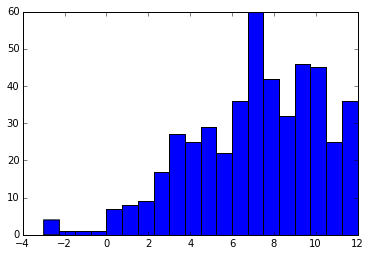

In [145]:
columns_grades, data_grades = loader.load_data("grades", "january_2012")

dict = {}
for column, array in zip(columns_grades, data_grades):
    dict[column] = array
dataframe_grades = pandas.DataFrame(dict)

x = []

for user in set(list(dataframe_grades['user'])):
    u_df = dataframe_grades[dataframe_grades['user'] == user]
    grades = []
    for g in list(u_df['grade']):
        try:
            grades.append(int(g))
        except ValueError:
            pass
    if len(grades) > 0:
        x.append(np.mean(grades))
        
plt.hist(x,bins=20)
plt.show()

In [149]:
Counter(dataframe_bluetooth[dataframe_bluetooth['bt_mac'] >= 0]['class'])

Counter({5898764: 2501709, 2360332: 1, 5374476: 1})

In [171]:
import sys

major_class_bitmask = 7936
phone_class = 0x000200

def is_phone(deviceClass):
    return (deviceClass & major_class_bitmask) == phone_class

if __name__ == "__main__":
    print is_phone(int(5898764))


True


In [188]:
(5898764 & 7936) == phone_class

True

In [194]:
print "\t", bin(5898764)
print "\t\t ", bin(7936)

	0b10110100000001000001100
		  0b1111100000000


In [196]:
int("0b1000000000", 2)

512

In [204]:
Counter(dataframe_stop_locations[dataframe_stop_locations['user'] == 0]['label'])

Counter({90: 28, 11: 24, 13: 21, 12: 8, 44: 5, 390: 3, 294: 3, 40: 3, 127: 3, 121: 2, 219: 2, 37: 2, 377: 2, 2: 1, 278: 1, 6: 1, 7: 1, 172: 1, 394: 1, 54: 1, 301: 1, 276: 1, 21: 1, 406: 1, 280: 1, 35: 1, 418: 1, 91: 1, 425: 1, 419: 1, 174: 1, 50: 1, 435: 1, 437: 1, 182: 1, 441: 1, 59: 1, 318: 1, 192: 1, 325: 1, 72: 1, 203: 1, 333: 1, 337: 1, 339: 1, 297: 1, 96: 1, 359: 1, 361: 1, 365: 1, 255: 1, 370: 1, 383: 1, 247: 1, 122: 1, 123: 1})

In [205]:
dataframe_stop_locations

,arrival,departure,label,lat,lon,timestamp,user
0,1388538000,1388603700,1,55.744777,12.546418,1388541600000,784
1,1388605500,1388614500,29,55.711430,12.565539,1388609100000,784
2,1388615400,1388668500,1,55.744776,12.546420,1388619000000,784
3,1388669400,1388671200,23,55.745909,12.540880,1388673000000,784
4,1388672100,1388687400,1,55.744777,12.546417,1388675700000,784
5,1388690100,1388762100,1,55.744725,12.546381,1388693700000,784
6,1388765700,1388824200,1,55.744777,12.546420,1388769300000,784
7,1388826000,1388829600,56,55.810956,12.514193,1388829600000,784
8,1388835000,1388837700,20,55.717446,12.442254,1388838600000,784
9,1388840400,1388842200,43,55.676556,12.547488,1388844000000,784


In [60]:
dataframe_sms

,address,status,timestamp,type,user
0,56205,-1,1441070651000,2,130
1,56205,-1,1441070674000,1,130
2,5276,-1,1441066434000,2,531
3,22521,32,1441066547000,2,460
4,6372,-1,1441069941000,1,292
5,72599,-1,1441113258000,1,580
6,459,-1,1441093371000,2,260
7,459,-1,1441094542000,1,260
8,805,-1,1441095801000,2,260
9,805,-1,1441095903000,1,260


In [2]:
with open('data/questionnaire.json') as infile:
    tmp = json.load(infile)

In [10]:
qs = set(["sex", "birthyear", "live_alone", "know_other", "know_other_number", "homophily_competent", "homophily_socialize", "homophily_importance", "homophily_sex", "homophily_upbringing", "homophily_upbringing_family[]", "self_efficacy_problems", "self_efficacy_goal", "self_efficacy_calm", "self_efficacy_pass", "self_efficacy_motto", "ambition_career", "ambition_mark", "ambition_job", "homophily_talent", "homophily_diligence", "homophily_talent_dtu", "homophily_diligence_dtu", "homophily_popularity", "homophily_popularity_dtu", "contact_partner", "contact_mother", "contact_father", "contact_zieblings", "contact_other_familily", "contact_friends", "electronic_contact_partner", "electronic_contact_mother", "electronic_contact_zieblings", "electronic_contact_other_family", "electronic_contact_friends", "help_partner", "help_mother", "help_father", "help_zieblings", "help_other_family", "help_friends", "talk_partner", "talk_mother", "talk_father", "talk_zieblings", "talk_other_family", "talk_friends", "demands_partner", "demands_mother", "demands_father", "demands_zieblings", "demands_other_family", "demands_friends", "worries_partner", "worries_mother", "worries_father", "worries_zieblings", "worries_other_family", "worries_freinds", "conflicts_partner", "conflicts_mother", "conflicts_father", "conflicts_zieblings", "conflicts_other_family", "conflicts_friends", "bfi_talk", "bfi_error", "bfi_work", "bfi_depressed", "bfi_original", "bfi_reserved", "bfi_helpfull", "bfi_careless", "bfi_relaxed", "bfi_currious", "bfi_energi", "bfi_fight", "bfi_reliable", "bfi_tense", "bfi_creative", "bfi_enthusiasm", "bfi_forgive", "bfi_disorderly", "bfi_worry", "bfi_imagination", "bfi_quiet", "bfi_confident", "bfi_lazy", "bfi_stable", "bfi_inventive", "bfi_strong_personality", "bfi_cold", "bfi_hold_on", "bfi_unbalanced", "bfi_art", "bfi_shy", "bfi_caring", "bfi_effective", "bfi_calm", "bfi_rutine", "bfi_social", "bfi_rude", "bf_complet", "bfi_nervous", "bfi_play", "bfi_few_art", "bfi_coorporation", "bfi_distract", "bfi_taste_art", "loneliness_wavelength", "loneliness_miss", "loneliness_turn_to_no", "loneliness_alone", "lonelinessfriends_", "loneliness_common", "loneliness_close_no", "loneliness_ideas", "loneliness_outgoing", "loneliness_close", "loneliness_outside", "loneliness_meaningful", "loneliness_know", "loneliness_isolated", "loneliness_together", "loneliness_understand", "loneliness_shy", "loneliness_people_around", "loneliness_talk_to", "loneliness_turn_to", "involuntary_alone", "height", "weight", "selfreported_health", "function_activity", "symptoms_shoulder", "symptoms_back", "symptoms_leg", "symptoms_headache", "symptoms_palpitation", "symptoms_anxiety", "symptoms_sleep", "symptoms_depressed", "symptoms_stomachache", "symptoms_indigestion", "symptoms_eczema", "symptoms_cold", "symptoms_breath", "physical_function_exercise", "physical_function_physical", "physical_function_run", "physical_function_lift", "physical_function_run_8", "smoke_freq", "smoke_first_cigarette", "smoke_daily", "smoke_volume_cigarette", "smoke_volume_cerut", "smoke_volume_cigar", "smoke_volume_pibe", "alcohol_debut", "alcohol_drunk", "alcohol_volume_monday", "alcohol_volume_tuesday", "alcohol_volume_wednesday", "alcohol_volume_thursday", "alcohol_volume_friday", "alcohol_volume_saturday", "alcohol_volume_sunday", "alcohol_weekend", "alcohol_very_drunk", "alcohol_everyday", "alcohol_binge5", "alcohol_binge10", "physical_activity", "drugs_marihuana", "drugs_other", "drugs_life", "drugs_12months", "drugs_30days", "medicine_headache", "medicine_pain", "medicine_sleep", "medicine_depressed", "medicine_nervous", "medicine_concentration", "medicine_physical", "sleep_uncalm", "sleep_falling", "sleep_early", "sleep_wake", "sleep_time_falling", "sleep_time_wake", "satisfaction_ideal", "satisfaction_condition", "satisfaction_satisfied", "satisfaction_gain", "satisfaction_change", "selfesteem_satisfied", "selfesteem_good", "selfesteem_qualities", "selfesteem_proud", "selfesteem_useless", "selfesteem_valuable", "selfesteem_respect", "selfesteem_failure", "selfesteem_positive", "stress_upset", "stress_important", "stress_stress", "stress_coping", "stress_wish", "stress_overcome", "stress_irritate", "stress_control", "stress_angry", "stress_difficulties", "mdi_depressed", "mdi_interest", "mdi_energy", "mdi_confidence", "mdi_guilty", "mdi_life", "mdi_concentration", "mdi_restless", "mdi_quiet", "mdi_sleep", "mdi_low_appetite", "mdi_high_appetite", "panas_upset", "panas_hostile", "panas_attention", "panas_embarrased", "panas_inspired", "panas_nervous", "panas_goal", "panas_present", "panas_afraid", "panas_active", "function_concentration", "function_alone", "function_human", "function_freinds", "function_duties", "function_education", "function_area", "locus_of_control_1", "locus_of_control_2", "locus_of_control_3", "locus_of_control_4", "locus_of_control_5", "locus_of_control_6", "locus_of_control_7", "locus_of_control_8", "locus_of_control_9", "locus_of_control_10", "locus_of_control_11", "locus_of_control_12", "locus_of_control_13", "narcissism_fantastic", "narcissism_famous", "narcissism_special", "narcissism_irritation", "narcissism_sucess", "narcissism_opponents", "narcissism_attention", "narcissism_personality", "narcissism_competitor", "narcissism_people", "narcissism_critisism", "narcissism_centre", "narcissism_gain", "narcissism_worth", "narcissism_strength", "narcissism_excellent", "narcissism_looser", "narcissism_slick", "online_roleplay", "religion", "selfrated_appearance", "trust_other", "give_money", "later_contact", "comments", "course_attendance", "vector", "vector_why", "role_highschool", "life_events_bullied", "life_events_school", "life_events_placed", "life_events_illness", "life_events_mom_died", "life_events_dad_died", "life_events_family_conflict", "life_events_divorce", "life_events_unemployment", "life_events_financial_problems", "selfesteem_doing_things", "place_academic", "place_hardwork", "symptoms_tired", "vektor_nextyr", "vektor_rejected", "polknow_selfrep", "poldiscuss", "voted_munic", "votedfor_munic", "votedfor_ep", "votedfor_ep_hypo", "votedfor_patent", "votedfor_patent_hypo", "polknow_patent1", "polknow_patent2", "polknow_patent3"])

In [11]:
qs_a = set(tmp['results'][0].keys())

In [18]:
qs - qs_a

{'course_attendance',
 'life_events_bullied',
 'life_events_dad_died',
 'life_events_divorce',
 'life_events_family_conflict',
 'life_events_financial_problems',
 'life_events_illness',
 'life_events_mom_died',
 'life_events_placed',
 'life_events_school',
 'life_events_unemployment',
 'place_academic',
 'place_hardwork',
 'poldiscuss',
 'polknow_patent1',
 'polknow_patent2',
 'polknow_patent3',
 'polknow_selfrep',
 'role_highschool',
 'vector',
 'vector_why',
 'vektor_nextyr',
 'vektor_rejected',
 'voted_munic',
 'votedfor_ep',
 'votedfor_ep_hypo',
 'votedfor_munic',
 'votedfor_patent',
 'votedfor_patent_hypo'}

In [181]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1
        
        
        

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [182]:
x = []
left_out_words = list((qs - qs_a))
for w in left_out_words:
    x.append(min([(w_,levenshteinDistance(w, w_)) for w_ in qs_a], key=lambda x: x[1]))

In [184]:
for i,(w_, d) in enumerate(x):
    if d < 8 and len(w_) >= 8:
        print left_out_words[i], w_

lowest comments
alcohol religion
contact comments
votedfor_ep smoke_freq
function religion
voted_munic give_money
demands comments
life_events life_style
conflicts comments
electronic_contact electronic_contact_family
worries comments


In [120]:
qs_a

{u'_submitted',
 u'alcohol_binge10',
 u'alcohol_binge5',
 u'alcohol_debut',
 u'alcohol_drunk',
 u'alcohol_everyday',
 u'alcohol_very_drunk',
 u'alcohol_volume_friday',
 u'alcohol_volume_monday',
 u'alcohol_volume_saturday',
 u'alcohol_volume_sunday',
 u'alcohol_volume_thursday',
 u'alcohol_volume_tuesday',
 u'alcohol_volume_wednesday',
 u'alcohol_weekend',
 u'ambition_career',
 u'ambition_job',
 u'ambition_mark',
 u'bf_complet',
 u'bfi_art',
 u'bfi_calm',
 u'bfi_careless',
 u'bfi_caring',
 u'bfi_cold',
 u'bfi_confident',
 u'bfi_coorporation',
 u'bfi_creative',
 u'bfi_currious',
 u'bfi_depressed',
 u'bfi_disorderly',
 u'bfi_distract',
 u'bfi_effective',
 u'bfi_energi',
 u'bfi_enthusiasm',
 u'bfi_error',
 u'bfi_few_art',
 u'bfi_fight',
 u'bfi_forgive',
 u'bfi_helpfull',
 u'bfi_hold_on',
 u'bfi_imagination',
 u'bfi_inventive',
 u'bfi_lazy',
 u'bfi_nervous',
 u'bfi_original',
 u'bfi_play',
 u'bfi_quiet',
 u'bfi_relaxed',
 u'bfi_reliable',
 u'bfi_reserved',
 u'bfi_rude',
 u'bfi_rutine',
 u'

In [4]:
dataframe_stop_locations

,arrival,departure,label,lat,lon,timestamp,user
0,1388538000,1388603700,1,55.744777,12.546418,1388541600000,784
1,1388605500,1388614500,29,55.711430,12.565539,1388609100000,784
2,1388615400,1388668500,1,55.744776,12.546420,1388619000000,784
3,1388669400,1388671200,23,55.745909,12.540880,1388673000000,784
4,1388672100,1388687400,1,55.744777,12.546417,1388675700000,784
5,1388690100,1388762100,1,55.744725,12.546381,1388693700000,784
6,1388765700,1388824200,1,55.744777,12.546420,1388769300000,784
7,1388826000,1388829600,56,55.810956,12.514193,1388829600000,784
8,1388835000,1388837700,20,55.717446,12.442254,1388838600000,784
9,1388840400,1388842200,43,55.676556,12.547488,1388844000000,784


In [6]:
dataframe_bluetooth

,bt_mac,class,rssi,timestamp,user
0,-1,-1,0,1390185391000,518
1,-1,-1,0,1390185693000,518
2,-1,-1,0,1390185995000,518
3,-1,-1,0,1390186295000,518
4,-1,-1,0,1390186596000,518
5,-1,-1,0,1390186896000,518
6,-1,-1,0,1390187195000,518
7,-1,-1,0,1390187496000,518
8,-1,-1,0,1390187796000,518
9,-1,-1,0,1390188096000,518


In [8]:
df_bluetooth = dataframe_bluetooth

In [3]:
import pandas as pd
from datetime import datetime as dt
import numpy as np

def atcapply(df, time_constraint):
    df_tmp = pd.DataFrame()
    for s in time_constraint['spans']:
        df_tmp = pd.concat([
                df_tmp,
                df[(df['timestamp']/1000 >= int(dt.strptime(s[0], "%d/%m/%y").strftime("%s"))) & 
                       (df['timestamp']/1000 <= int(dt.strptime(s[1], "%d/%m/%y").strftime("%s")))]
            ])
    df = df_tmp

    # Apply hours and days constraints
    hod = lambda x: np.floor(x%86400/3600)
    dow = lambda x: np.floor((x%(86400*7)/86400+3)%7) #add 3 days cause 0th second is thursday (index 3)

    df = df[(hod(df['timestamp']/1000).isin(time_constraint['hours'])) & 
            (dow(df['timestamp']/1000).isin(time_constraint['days']))]

    return df


from sensible_raw.loaders import loader
from datetime import datetime as dt
import pandas as pd

def load(spans, dataset):
    """Load touched datasets given time constraint.
    
    Parameters
    ----------
    spans : list-of-tuples
        A list of timespans that needs to be loaded data for
    dataset : str
        The name of the dataset that should be loaded
        
    Returns
    -------
    df : Pandas Dataframe
    """
    
    months_int = set(
        [item for sublist in 
         [
                range(
                    dt.strptime(s[0], "%d/%m/%y").month-1, 
                    dt.strptime(s[1], "%d/%m/%y").month) 
                for s in spans
            ] 
         for item in sublist])

    months = [dt.strptime(str(m+1), '%m').strftime("%B").lower() for m 
              in months_int]

    years      = set(
        [item for sublist in 
         [
                range(
                    dt.strptime(s[0], "%d/%m/%y").year, 
                    dt.strptime(s[1], "%d/%m/%y").year+1) 
                for s in spans
            ] 
         for item in sublist])

    df = pd.DataFrame()

    for y in years:
        print "<" + str(y) + ">",
        for m in months:
            print m,
            columns, data = loader.load_data(dataset, "%s_%d" % (m, y))
            dict_tmp = {}
            for column, array in zip(columns, data):
                dict_tmp[column] = array
                df = pd.concat([df, pd.DataFrame(dict_tmp)], ignore_index=True)
                
    return df

In [8]:
from sensible_raw.loaders import loader
import pandas as pd
from collections import Counter
from datetime import datetime as dt
import numpy as np
import os

class Bluetooth_extractor:

    def __init__(self, time_constraint, suppress=[], auxlabel="", load_old_datasources=False):
        
        self.suppress = suppress
        self.auxlabel = auxlabel
        
        ROOTPATH = os.path.abspath('')
        
        if not load_old_datasources:
            print "[bluetooth] Building datasource from scratch ...",
        
            self.df_bluetooth = load(time_constraint['spans'], "bluetooth_2")

            # Remove non-phone and > 1.5 m connections.
            #is_phone = lambda x: (x & 0x001F00) == 0x000200
            #df_bluetooth = df_bluetooth[(is_phone(df_bluetooth['class'])==True) & (df_bluetooth['rssi'] > -75)]

            #df_bluetooth = atcapply(df_bluetooth, time_constraint)

            # Sort dataframe
            #self.df_bluetooth = df_bluetooth.sort(['timestamp'], ascending=[1])
            self.users = set(self.df_bluetooth['user'])
            
            # Save
            #print "... succes! Saving."
            #self.df_bluetooth.to_pickle(ROOTPATH + '/data_cache/%sdf_bluetooth.pickle' % auxlabel)
            
        else:
            # Load
            #print "[bluetooth] Loading datasource from local."
            #self.df_bluetooth = pd.read_pickle(ROOTPATH + '/data_cache/%sdf_bluetooth.pickle' % auxlabel)
            #self.users = set(self.df_bluetooth['user'])
            pass
        
        print "[bluetooth] Number of datapoints in range:", len(self.df_bluetooth)
        
        
    def __compute_entropy(self, user):
        state_counter = Counter()

        connections = list(self.df_bluetooth[self.df_bluetooth['user'] == user]['bt_mac'])
        state_counter.update(connections)

        p = np.array(state_counter.values()) * 1.0/len(connections)
        
        Ni = len(p); entropy = 0.0
        for j in range(Ni):
            entropy -= p[j]*np.log(p[j])
        return entropy

    
    def main(self, user):
        if user not in self.users:
            raise Exception('User %s not in dataset' % user)
            
        return {'%sbluetooth_social_entropy' % self.auxlabel: self.__compute_entropy(user)}

In [9]:
is_phone = lambda x: (x & 0x001F00) == 0x000200
df_bluetooth = df_bluetooth[(is_phone(df_bluetooth['class'])==True) & (df_bluetooth['rssi'] > -75)]


NameError: name 'df_bluetooth' is not defined

In [10]:
tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14")]} #in school
bluetooth = Bluetooth_extractor(tc0, suppress=[], auxlabel="tc0_", load_old_datasources=False)

[bluetooth] Building datasource from scratch ... <2014> january [bluetooth] Number of datapoints in range: 35122110


In [17]:
bluetooth.df_bluetooth[(is_phone(bluetooth.df_bluetooth['class'])==True) & (bluetooth.df_bluetooth['rssi'] > -75)]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [3]:
import math
 
def distance_on_unit_sphere(lat1, long1, lat2, long2):
 
    degrees_to_radians = math.pi/180.0
         
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
         
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
     
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + 
           math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )
 
    return arc

In [4]:
from collections import defaultdict

In [30]:
locations = defaultdict(list)

In [31]:
for row in dataframe_stop_locations.iterrows():
    locations[row[1]['label']].append([row[1]['lon'],row[1]['lat']])

In [41]:
locations1 = dict((k, (np.mean(zip(*v)[0]),np.mean(zip(*v)[1]))) for k,v in locations.items())

In [42]:
locations1[1]

(12.392195576466401, 55.68497551655917)

In [48]:
cd ..

/home/ulf/build_dataset


In [49]:
from workers.location_is_home import validate

In [63]:
df = dataframe_stop_locations[dataframe_stop_locations['user']==1]

In [68]:
locations = defaultdict(list)
for row in df.iterrows():
    coordinate = tuple(row[1][['lat','lon']])
    locations[row[1]['label']].append(coordinate)

In [95]:
locations[35]

[(55.78288483, 12.519650522499999)]

In [67]:
row[1]['label']

4.0

In [93]:
locations.keys()

[0.0,
 1.0,
 2,
 3,
 4.0,
 5,
 6.0,
 7.0,
 8,
 9,
 10,
 11,
 12.0,
 13.0,
 14.0,
 15,
 16,
 17.0,
 18,
 19,
 20,
 21,
 22,
 30.0,
 35.0]

In [5]:
dataframe_calllog

,duration,number,timestamp,type,user
0,0,1504,1389088586000,3,228
1,0,1505,1389093013000,2,228
2,2,1506,1389093054000,2,228
3,74,1504,1389097999000,1,228
4,30,1506,1389290929000,2,228
5,0,1543,1390926665000,3,228
6,89,1543,1390926793000,2,228
7,17,1544,1390928197000,2,228
8,0,1543,1390928442000,3,228
9,0,1545,1390928840000,3,228


In [12]:
(1391045119000-1389340092000)/1000/86400

19

In [14]:
dataframe_bluetooth.sort(['timestamp'], ascending=[1])[dataframe_bluetooth['bt_mac'] != -1][dataframe_bluetooth['user']==518]
#print  1391045119000 -1389340092000	

,bt_mac,class,rssi,timestamp,user
243172,-1824579,5898764,-84,1388536878000,518
240089,-1741452,6815744,-87,1388541114000,518
240092,-1824579,5898764,-90,1388541717000,518
240091,71,5898764,-90,1388541717000,518
240094,-1824579,5898764,-78,1388542015000,518
240093,71,5898764,-92,1388542015000,518
240095,71,5898764,-93,1388542318000,518
240096,-1824579,5898764,-82,1388542318000,518
240097,-1824579,5898764,-90,1388542624000,518
240098,71,5898764,-98,1388542624000,518


In [17]:
dataframe_stop_locations[dataframe_stop_locations['user']==1].sort(['timestamp'], ascending=[1])

,arrival,departure,label,lat,lon,timestamp,user
6205,1388556900,1388558700,4,55.641345,12.613186,1388560500000,1
6206,1388559600,1388572200,4,55.641792,12.613122,1388563200000,1
6207,1388576700,1388638800,0,55.235251,11.780540,1388580300000,1
6208,1388639700,1388643300,0,55.235003,11.780909,1388643300000,1
6209,1388644200,1388651400,0,55.235126,11.780583,1388647800000,1
6210,1388654100,1388658600,0,55.235258,11.780458,1388657700000,1
6211,1388664900,1388665800,30,55.770002,12.504357,1388668500000,1
6212,1388666700,1388667600,14,55.819055,12.492024,1388670300000,1
6213,1388673000,1388678400,0,55.235327,11.780403,1388676600000,1
6214,1388679300,1388684700,0,55.235183,11.780751,1388682900000,1


In [1]:
cd ../..

/home/ulf/pipeline_code


In [2]:
%matplotlib inline
import numpy as np
from sklearn.preprocessing import scale
import json
from sensible_raw.loaders import loader

In [3]:
from build_dataset.extractors.sms_extractor import Sms_extractor
from build_dataset.extractors.stop_locations_extractor import Stop_locations_extractor
from build_dataset.extractors.screen_extractor import Screen_extractor
##from facebook_friends_extractor import Facebook_friends_extractor
from build_dataset.extractors.bluetooth_extractor import Bluetooth_extractor
##from calllog_extractor import Calllog_extractor
##from location_extractor import Location_extractor
from build_dataset.extractors.big_five_extractor import Big_five_extractor

from build_dataset.analysis.outlier_detection import Outlier_detector_svm, Outlier_detector_kd
from build_dataset.analysis.location_reference import Load_location_reference
#from analysis.social_state_reference import Load_social_state_reference
from build_dataset.analysis.consensus_archetypes import Consensus_archetypes

In [4]:
# tc0: School periods (when there are lectures)
# tc1: Exam periods
# tc2: Holiday periods

tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14"), ("03/02/14","16/05/14"), ("01/09/14","05/12/14"), ("02/06/14","20/06/14")]}
tc1 = {'hours': range(24), 'days': range(7), 'spans': [("17/05/14","01/06/14"), ("06/12/14", "21/12/14")]}
tc2 = {'hours': range(24), 'days': range(7), 'spans': [("01/01/14","05/01/14"), ("25/01/14","02/02/14"), ("14/04/14","20/04/14"), ("21/06/14","30/08/14"), ("22/12/14", "31/12/14")]}

In [5]:
location_reference = Load_location_reference(tc0, auxlabel="tc0_", load_reference=True)
#social_state_reference = Load_social_state_reference(tc0, auxlabel="tc0_", load_reference=False)

[location_reference] Loading datasource from local.


In [6]:
load_datasources_from_local = True

sms = Sms_extractor(tc0, suppress=[], auxlabel="tc0_", load_old_datasources=False)
stop_locations = Stop_locations_extractor(tc0, suppress=[], auxlabel="tc0_", load_old_datasources=load_datasources_from_local)
screen = Screen_extractor(tc0, suppress=[], auxlabel="tc0_", load_old_datasources=load_datasources_from_local)
##facebook_friends = Facebook_friends_extractor()
bluetooth = Bluetooth_extractor(tc0, suppress=[], auxlabel="tc0_", load_old_datasources=load_datasources_from_local)
##calllog = Calllog_extractor()
##location = Location_extractor()
big_five = Big_five_extractor()

[sms] Building datasource from scratch ... <2014> jan feb mar apr may jun sep oct nov dec ...succes! Saving.
[sms] Number of datapoints in range: 1786225
[stop_locations] Loading datasource from local.
[stop_locations] Number of datapoints in range: 450662
[screen] Loading datasource from local.
[screen] Number of datapoints in range: 20211170
[bluetooth] Loading datasource from local.
[bluetooth] Number of datapoints in range: 3312659
[big_five_extractor] Loaded data from local copy!


In [7]:
import bson

In [10]:
help(bson)

Help on package bson:

NAME
    bson - BSON (Binary JSON) encoding and decoding.

FILE
    /usr/local/lib/python2.7/dist-packages/bson/__init__.py

PACKAGE CONTENTS
    _cbson
    binary
    code
    codec_options
    dbref
    errors
    int64
    json_util
    max_key
    min_key
    objectid
    py3compat
    regex
    son
    timestamp
    tz_util

CLASSES
    __builtin__.str(__builtin__.basestring)
        BSON
    
    class BSON(__builtin__.str)
     |  BSON (Binary JSON) data.
     |  
     |  Method resolution order:
     |      BSON
     |      __builtin__.str
     |      __builtin__.basestring
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     |  decode(self, codec_options=CodecOptions(document_class=dict, tz_aware=False, uuid_representation=PYTHON_LEGACY))
     |      Decode this BSON data.
     |      
     |      By default, returns a BSON document represented as a Python
     |      :class:`dict`. To use a different :class:`MutableMapping

In [11]:
bson.BSON

bson.BSON